In [18]:
#Execute this cell if have problem with relative import

import sys; sys.path.insert(0, '..')

In [19]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sb
import json

In [20]:
from Preprocessing.data_keys import get_decade

In [21]:
players_mlb = {}
with open("../Data/mlb_players.json", 'r') as json_file:
    players_mlb:dict = json.load(json_file)

In [57]:
actives = 0
non_actives = 0
in_mayors = 0
plus_than_2_years,plus_than_4_years,plus_than_6_years,plus_than_9_years = 0,0,0,0
as_player_hof = 0
hof_type = {}
hof_number_of_seasons = {}
hof_nationality = {}
induction_year = {}
induction_decade_dic = {}
induction_decade_list = []
retirament_decade_list = []
hall_players_type = {1:0,2:0,3:0}
all_players_type = {1:0,2:0,3:0}
for p_id in players_mlb.keys():
    player = players_mlb[p_id]
    if player["Active"]:
        actives +=1
    else:
        non_actives+=1
    all_players_type[player["Player type"]]+=1
    if "AL" in player['career_leagues'] or "NL" in player['career_leagues']:
        in_mayors+=1
    total_seasons = int(player["total_seasons"])
    if total_seasons > 9:
        plus_than_9_years+=1
        plus_than_6_years+=1
        plus_than_4_years+=1
        plus_than_2_years+=1
    elif total_seasons > 6:
        plus_than_6_years+=1
        plus_than_4_years+=1
        plus_than_2_years+=1
    elif total_seasons>4:
        plus_than_4_years+=1
        plus_than_2_years+=1
    elif total_seasons>2:
        plus_than_2_years+=1
    if player["HoF"] == 1:
        hall_players_type[player["Player type"]]+=1
        if hof_nationality.get(player['Country']) == None:
            hof_nationality[player['Country']] = 1
        else:
            hof_nationality[player['Country']]+=1
        h_type = player["HoF type"].lower()
        if 'player' == h_type:
            as_player_hof +=1
        if hof_type.get(h_type) == None:
            hof_type[h_type] = 1
        else:
            hof_type[h_type]+=1
        if hof_number_of_seasons.get(total_seasons)==None:
            hof_number_of_seasons[total_seasons] = 1
        else:
            hof_number_of_seasons[total_seasons] += 1
        i_year = int(player["HoF year"])
        if induction_year.get(i_year) == None:
            induction_year[i_year] = 1
        else:
            induction_year[i_year] +=1
        i_decade = get_decade(i_year)
        if induction_decade_dic.get(i_decade) == None:
            induction_decade_dic[i_decade] = 1
        else:
            induction_decade_dic[i_decade] += 1
        induction_decade_list.append(i_decade)
        r_decade = get_decade(int(player["Last year"]))
        retirament_decade_list.append(r_decade)

In [28]:
print(f"{plus_than_2_years}-->{plus_than_4_years}-->{plus_than_6_years}-->{plus_than_9_years}")


12735-->8840-->6360-->3788


In [33]:
from pprint import pprint
pprint(induction_decade_dic)
pprint(hall_players_type)
pprint(all_players_type)

{1930: 22,
 1940: 31,
 1950: 22,
 1960: 30,
 1970: 48,
 1980: 31,
 1990: 33,
 2000: 36,
 2010: 34,
 2020: 9}
{1: 73, 2: 204, 3: 19}
{1: 9635, 2: 12101, 3: 946}


{'ca': 2,
 'cu': 6,
 'do': 4,
 'gb': 1,
 'nl': 1,
 'pa': 2,
 'pr': 4,
 'us': 275,
 've': 1}


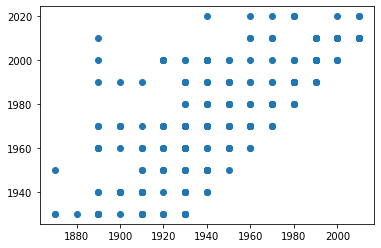

In [58]:
pprint(hof_nationality)
fig, ax = plt.subplots()
ax.scatter(x=retirament_decade_list, y =induction_decade_list)

In [35]:
in_mayors

19611

In [56]:
pprint(retirament_decade_list)

[40,
 30,
 40,
 30,
 30,
 20,
 30,
 40,
 40,
 20,
 30,
 30,
 40,
 30,
 40,
 30,
 40,
 30,
 30,
 30,
 30,
 40,
 40,
 40,
 40,
 40,
 30,
 40,
 30,
 30,
 30,
 30,
 40,
 40,
 30,
 30,
 30,
 20,
 30,
 30,
 30,
 30,
 30,
 30,
 40,
 30,
 40,
 30,
 30,
 30,
 30,
 30,
 40,
 30,
 20,
 40,
 30,
 40,
 30,
 30,
 40,
 30,
 40,
 30,
 20,
 30,
 30,
 30,
 30,
 30,
 30,
 40,
 30,
 30,
 30,
 40,
 30,
 40,
 30,
 30,
 30,
 40,
 30,
 30,
 40,
 30,
 30,
 30,
 40,
 30,
 30,
 30,
 30,
 30,
 30,
 40,
 30,
 40,
 30,
 30,
 40,
 40,
 40,
 30,
 40,
 40,
 30,
 30,
 30,
 40,
 40,
 30,
 30,
 30,
 40,
 30,
 30,
 40,
 40,
 40,
 30,
 30,
 40,
 30,
 30,
 30,
 30,
 30,
 40,
 40,
 40,
 40,
 40,
 40,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 40,
 30,
 30,
 30,
 30,
 30,
 40,
 30,
 40,
 40,
 30,
 30,
 20,
 40,
 30,
 30,
 20,
 40,
 30,
 40,
 40,
 40,
 40,
 40,
 30,
 40,
 40,
 30,
 40,
 30,
 30,
 30,
 40,
 30,
 30,
 30,
 30,
 30,
 40,
 30,
 30,
 30,
 30,
 40,
 40,
 30,
 50,
 30,
 40,
 30,
 30,
 30,
 30,
 50,
 30,
 40,
 30,
